In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
login_data = pd.read_json('logins.json', orient='columns')
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
login_data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
interval_login_data = login_data.set_index(['login_time'])
interval_login_data.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [6]:
interval_login_data['count'] = 1
interval_login_data_15T = interval_login_data.resample('15T').count()
interval_login_data_15T = interval_login_data_15T.reset_index()
interval_login_data_15T.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


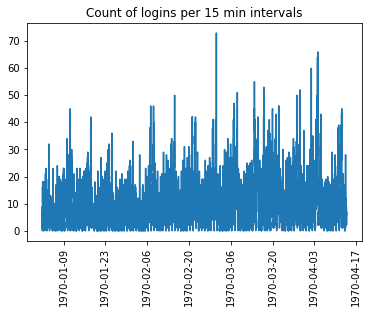

In [7]:
x= interval_login_data_15T['login_time']
y= interval_login_data_15T['count']
plt.plot(x,y)
plt.title('Count of logins per 15 min intervals')
plt.xticks(rotation=90);

In [8]:
january = interval_login_data_15T[(interval_login_data_15T.login_time > '1970-01')
                             & (interval_login_data_15T.login_time < '1970-02')]
february = interval_login_data_15T[(interval_login_data_15T.login_time > '1970-02')
                             & (interval_login_data_15T.login_time < '1970-03')]
march = interval_login_data_15T[(interval_login_data_15T.login_time > '1970-03')
                             & (interval_login_data_15T.login_time < '1970-04')]
april = interval_login_data_15T[(interval_login_data_15T.login_time > '1970-04')
                             & (interval_login_data_15T.login_time < '1970-05')]

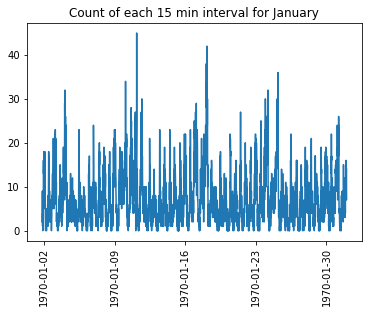

In [9]:
x= january['login_time']
y= january['count']
plt.plot(x,y)
plt.title('Count of each 15 min interval for January')
plt.xticks(rotation=90);

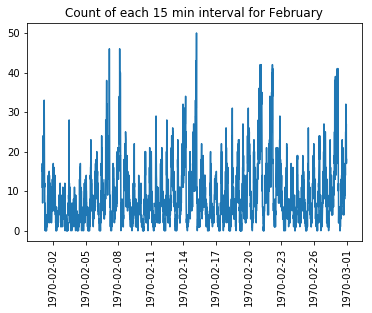

In [10]:
x= february['login_time']
y= february['count']
plt.plot(x,y)
plt.title('Count of each 15 min interval for February')
plt.xticks(rotation=90);

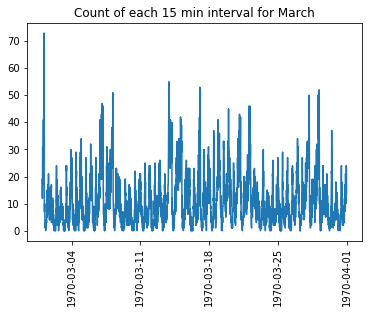

In [11]:
x= march['login_time']
y= march['count']
plt.plot(x,y)
plt.title('Count of each 15 min interval for March')
plt.xticks(rotation=90);

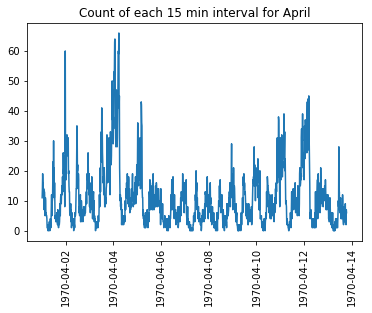

In [12]:
x= april['login_time']
y= april['count']
plt.plot(x,y)
plt.title('Count of each 15 min interval for April')
plt.xticks(rotation=90);

In [13]:
# Counting based on weekdays, 0 = Monday, 6 = Sunday
interval_login_data_15T['day']=interval_login_data_15T['login_time'].dt.dayofweek
daily= interval_login_data_15T.sort_values(by='count', ascending=False)
daily_counts= daily[['count', 'day']]
daily_count= daily_counts.groupby('day').sum().reset_index()
daily_count

,day,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


In [14]:
daily_count['day']= ['Mon','Tues','Wed','Thurs', 'Fri', 'Sat', 'Sun']
daily_count= daily_count[['day', 'count']]
daily_count

,day,count
0,Mon,8823
1,Tues,9268
2,Wed,10339
3,Thurs,11960
4,Fri,15208
5,Sat,19377
6,Sun,18167


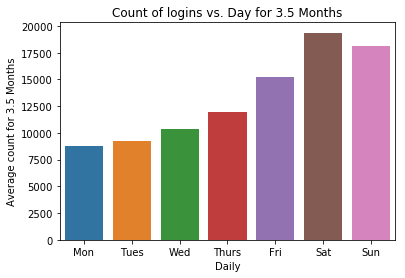

In [15]:
sns.barplot(x='day', y='count', data=daily_count)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Daily')
plt.title('Count of logins vs. Day for 3.5 Months')

In [16]:
# Splitting into hours
interval_login_data_15T['hour'] = interval_login_data_15T[
    'login_time'].dt.hour
hours = interval_login_data_15T
hour = hours[['count', 'hour']]
hour = hour.groupby('hour').sum().reset_index()
hour.head()

,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


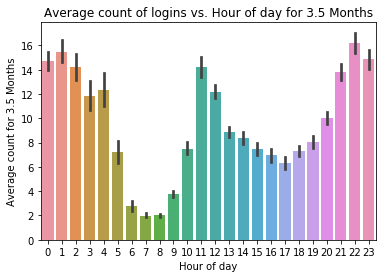

In [17]:
# Visualizing count of logins per hour of the day
sns.barplot(x='hour', y='count', data=hours)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Hour of day')
plt.title('Average count of logins vs. Hour of day for 3.5 Months')

In [18]:
# Splitting into 15 minute intervals# Splitt 
interval_login_data_15T['15_minute'] = interval_login_data_15T[
    'login_time'].dt.minute
minutes = interval_login_data_15T
minute = minutes[['count', '15_minute']]
minute = minute.groupby('15_minute').sum().reset_index()
minute

,15_minute,count
0,0,22660
1,15,22975
2,30,23962
3,45,23545


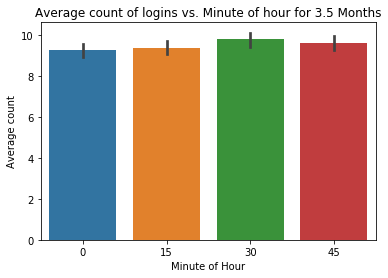

In [19]:
# Visualizing count of logins per quarter-hour
sns.barplot(x='15_minute', y='count', data=minutes)
plt.ylabel('Average count')
plt.xlabel('Minute of Hour')
plt.title('Average count of logins vs. Minute of hour for 3.5 Months')

## Conclusion for Part 1
1. Amount of user-logins increase and peak torwards the weekend.
2. Amount of user-logins increase during lunch time (11- am to noon) and during late-night (9 pm - 4 am)

## Part 2 - Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    * how you will implement the experiment.
    * what statistical test(s) you will conduct to verify the significance of the observation.
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Solution:
First, we talk about why the Ultimate managers want more driver partners to be available in both cities.

* To increase driver/rider acceptance-rates
* To increase driver/rider sign-ups
* To reduce driver/rider wait times
* To increase profit

Ultimately, increasing acceptance-rates and sign-ups while reducing wait times would lead to profit. In order to increase profit, the additional income brought in during the experiment must outweigh the toll cost reimbursements. We would use the key metric of profit after reimbursement.

There are two tests that we could do depending on the time and budget available. A simple study could be an A/B study. We would randomly select half of the drivers to participate in the study while we leave out the other half. After a few months, we compare the profit made after reimbursement of toll costs. A more robust study could last a year. All driver partners are included in the study and the profit made for the year is compared to the previous years with time series analysis. Both methods require more time and data for observation and analysis.

After getting our results, we would use a t-test to test for significance (p = 0.05) between each group.

The results of this experiment all depend on the increase in profits. If profits decreased after the experiment, it would mean that reimbursement of toll fees may not have been the most effective way to encourage drivers to be active in both cities in order to increase profits. There may have been exploitations of the incentive or an unconsidered exploitation. If profits stay the same, then the feature should be left intact due to the possible convenience to some drivers. Finally, if profits increase, it could mean that more experiments relating reimbursements such as gas or mileage will increase profits even further.

## Part 3: Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).


## Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

## Data Cleaning

In [20]:
# Read in the data
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [21]:
# Checking datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
# Since the date fields have been read in as 'object' data types, we should convert them to proper datetime format   
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [23]:
# Do the features take values we might expect?
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [24]:
# Look closer at missing values - how many exactly?

for column in list(df.columns):
    num_missing = len(df[df[column].isnull()])
    if num_missing != 0:
        print('There are {} missing values in {}'.format(num_missing, column))

There are 201 missing values in avg_rating_by_driver
There are 8122 missing values in avg_rating_of_driver
There are 396 missing values in phone


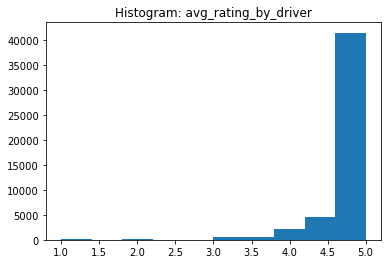

In [25]:
# Let's look at the distribution of values for avg_rating_by_driver# Let's  

plt.hist(df[np.logical_not(df['avg_rating_by_driver'].isnull())]['avg_rating_by_driver'])
plt.title('Histogram: avg_rating_by_driver')
plt.show;

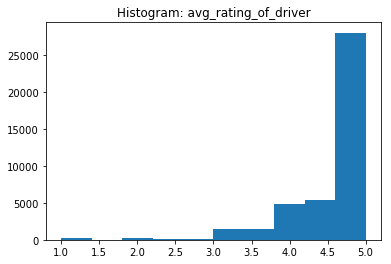

In [26]:
# Let's look at the distribution of values for avg_rating_of_driver# Let's  

plt.hist(df[np.logical_not(df['avg_rating_of_driver'].isnull())]['avg_rating_of_driver'])
plt.title('Histogram: avg_rating_of_driver')
plt.show;

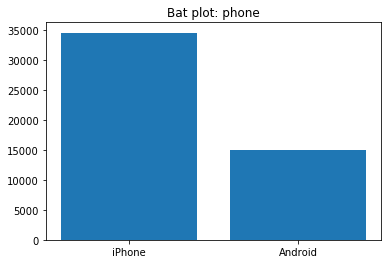

In [27]:
# Let's look at the distribution of values for phone

plt.bar([1,2], df[np.logical_not(df['phone'].isnull())]['phone'].value_counts(), align='center')
plt.xticks([1,2], ['iPhone', 'Android'])
plt.title('Bat plot: phone')
plt.show;

In [28]:
# Fill in missing values

df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [29]:
# Did it work?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [30]:
# Make lists of each feature type for easy plotting

numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

categorical_features = ['city', 'phone', 'ultimate_black_user']

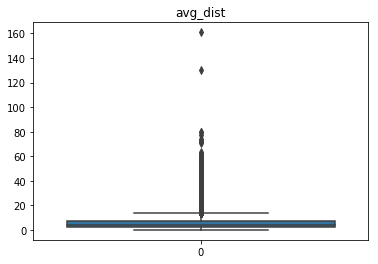

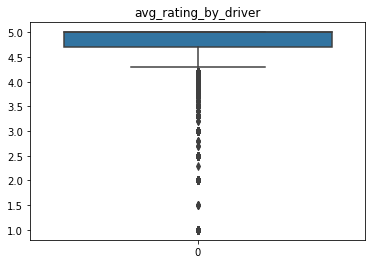

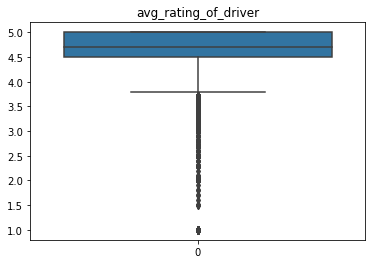

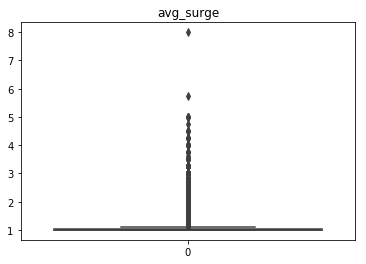

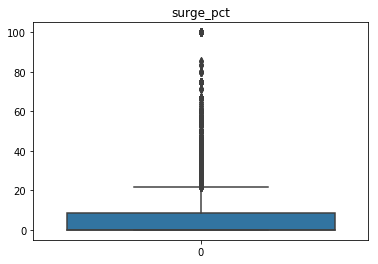

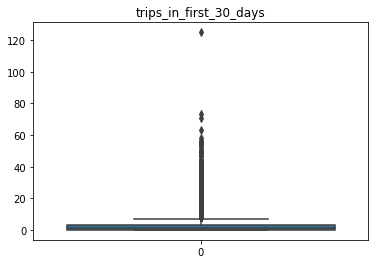

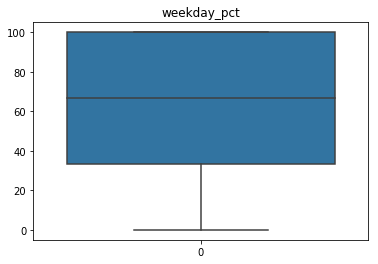

In [31]:
# Show boxplots of numerical features
import seaborn as sns

for feature in numerical_features:
    sns.boxplot(data=df[feature])
    plt.title(feature)
    plt.show();

In [32]:
# Filter out rows with features that have values more than 3 standard deviations from the mean
df = df[np.abs(df['avg_dist']-df['avg_dist'].mean())<=(3*df['avg_dist'].std())]
df = df[np.abs(df['avg_rating_by_driver']-df['avg_rating_by_driver'].mean())<=(3*df['avg_rating_by_driver'].std())]
df = df[np.abs(df['avg_rating_of_driver']-df['avg_rating_of_driver'].mean())<=(3*df['avg_rating_of_driver'].std())]
df = df[np.abs(df['avg_surge']-df['avg_surge'].mean())<=(3*df['avg_surge'].std())]
df = df[np.abs(df['surge_pct']-df['surge_pct'].mean())<=(3*df['surge_pct'].std())]
df = df[np.abs(df['trips_in_first_30_days']-df['trips_in_first_30_days'].mean())<=(3*df['trips_in_first_30_days'].std())]
df.reset_index(drop=True, inplace=True)

In [33]:
# How much data do we have now?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 12 columns):
avg_dist                  44666 non-null float64
avg_rating_by_driver      44666 non-null float64
avg_rating_of_driver      44666 non-null float64
avg_surge                 44666 non-null float64
city                      44666 non-null object
last_trip_date            44666 non-null datetime64[ns]
phone                     44666 non-null object
signup_date               44666 non-null datetime64[ns]
surge_pct                 44666 non-null float64
trips_in_first_30_days    44666 non-null int64
ultimate_black_user       44666 non-null bool
weekday_pct               44666 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.8+ MB


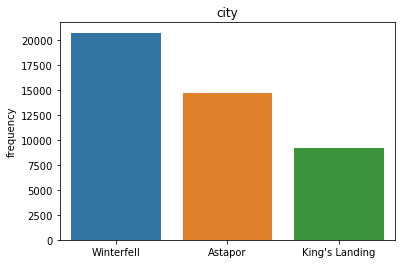

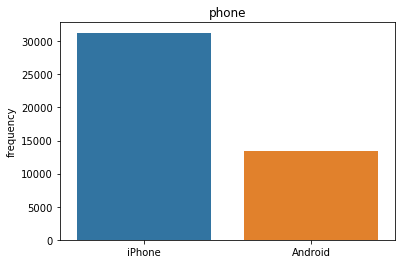

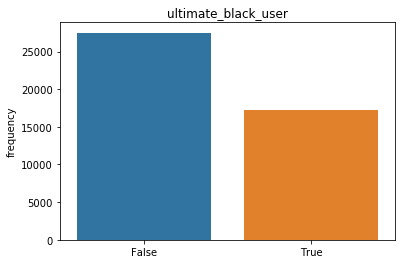

In [34]:
# Create box plots of all categorical, non-date data

for feature in categorical_features:
    sns.barplot(x = list(df[np.logical_not(df[feature].isnull())][feature].value_counts().index), 
                y = df[np.logical_not(df[feature].isnull())][feature].value_counts())
    plt.title(feature)
    plt.ylabel('frequency')
    plt.show();

We see that all non-date categorical features take values we would expect and so we do not need to clean these any further. Next, we will explore correlations to determine if there is any redundancy in the data or highly predictive features:

In [35]:
# Show the correlation matrix
corr_matrix = df.corr()
corr_matrix

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.113764,0.036985,-0.125715,-0.141120,-0.157064,0.032364,0.106505
avg_rating_by_driver,0.113764,1.000000,0.108811,-0.054707,-0.045886,-0.136598,-0.020618,0.019580
avg_rating_of_driver,0.036985,0.108811,1.000000,-0.030831,-0.012833,-0.058875,-0.011233,0.004661
avg_surge,-0.125715,-0.054707,-0.030831,1.000000,0.849852,0.150471,-0.016889,-0.091408
surge_pct,-0.141120,-0.045886,-0.012833,0.849852,1.000000,0.145407,-0.035394,-0.103303
trips_in_first_30_days,-0.157064,-0.136598,-0.058875,0.150471,0.145407,1.000000,0.082045,0.025849
ultimate_black_user,0.032364,-0.020618,-0.011233,-0.016889,-0.035394,0.082045,1.000000,0.021997
weekday_pct,0.106505,0.019580,0.004661,-0.091408,-0.103303,0.025849,0.021997,1.000000


In [36]:
# Filter to see if there are any features correlated at above 0.50 or below -0.50
corr_matrix[(abs(corr_matrix) >= 0.50) & (abs(corr_matrix) < 1.0)]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_by_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_surge,NaN,NaN,NaN,NaN,0.849852,NaN,NaN,NaN
surge_pct,NaN,NaN,NaN,0.849852,NaN,NaN,NaN,NaN
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# When was the last trip date in the dataset?
sorted(df['last_trip_date'].unique())[-10:]

[numpy.datetime64('2014-06-22T00:00:00.000000000'),
 numpy.datetime64('2014-06-23T00:00:00.000000000'),
 numpy.datetime64('2014-06-24T00:00:00.000000000'),
 numpy.datetime64('2014-06-25T00:00:00.000000000'),
 numpy.datetime64('2014-06-26T00:00:00.000000000'),
 numpy.datetime64('2014-06-27T00:00:00.000000000'),
 numpy.datetime64('2014-06-28T00:00:00.000000000'),
 numpy.datetime64('2014-06-29T00:00:00.000000000'),
 numpy.datetime64('2014-06-30T00:00:00.000000000'),
 numpy.datetime64('2014-07-01T00:00:00.000000000')]

In [38]:
print('{:.2f}% of users have taken a trip on or after June 1st, 2014 and are considered \'retained\'.'\
      .format(len(df[df['last_trip_date'] >= '2014-06-01'])/len(df)*100))

38.59% of users have taken a trip on or after June 1st, 2014 and are considered 'retained'.


## Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [39]:
# Create the target variable, retained

df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [40]:
# Drop last_trip_date
df.drop('last_trip_date', axis=1, inplace=True)

We will move forward by splitting this data into train and test sets, and model the data with a decision tree classifier. In addition, the decision tree does not handle data if it is not numerical in nature. We must drop all datetime features and one-hot-encode any categorical features.

The decision tree is a good choice in this scenario due to its interpretability and ease of finding the most predictive features of retention. In addition, the decision tree gives the best baseline accuracy compared to logistic regression, naive bayes, k-nearest-neighbors, random forest, bagged random forest, and bagged random (extra) tree classifiers.

In [41]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Drop other datetime features
df.drop('signup_date', axis=1, inplace=True)

In [43]:
# One-hot-encode all categorical features
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])

df_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1.0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0.0,0,0,1,1,0,1,0


In [44]:
# Split into train and test sets

train, test = train_test_split(df_encoded, test_size=.30, 
                               random_state=42, stratify=df_encoded['retained'])

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print('Train shape: {}\n Test shape: {}'.format(train.shape, test.shape))

Train shape: (31266, 15)
 Test shape: (13400, 15)


In [45]:
# Perform cross validation on the training set

from sklearn import cross_validation

target = train['retained']
train = train.drop('retained', axis=1)

clf = DecisionTreeClassifier(max_depth=4)

cv = cross_validation.KFold(len(train), n_folds=10)

cv_count = 1
for traincv, testcv in cv:  
        preds = clf.fit(train.loc[list(traincv),:], 
                        target.loc[list(traincv),]).predict(train.loc[list(testcv),:])
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(target.loc[testcv,], preds)

        print('Round {} CV\nAccuracy: {:.2f}\nAUC: {:.4f}\nConfusion Matrix:\n{}\n\n'\
                  .format(cv_count, accuracy_score(target.loc[testcv,], preds)*100, 
                          auc(false_positive_rate, true_positive_rate),
                          confusion_matrix(target.loc[testcv,], preds)))
        cv_count += 1

Round 1 CV
Accuracy: 73.90
AUC: 0.7243
Confusion Matrix:
[[1521  412]
 [ 404  790]]


Round 2 CV
Accuracy: 73.90
AUC: 0.7273
Confusion Matrix:
[[1472  397]
 [ 419  839]]




C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Round 3 CV
Accuracy: 75.38
AUC: 0.7405
Confusion Matrix:
[[1537  390]
 [ 380  820]]


Round 4 CV
Accuracy: 74.64
AUC: 0.7298
Confusion Matrix:
[[1535  370]
 [ 423  799]]


Round 5 CV
Accuracy: 74.22
AUC: 0.7269
Confusion Matrix:
[[1526  396]
 [ 410  795]]


Round 6 CV
Accuracy: 75.31
AUC: 0.7343
Confusion Matrix:
[[1576  364]
 [ 408  779]]


Round 7 CV
Accuracy: 75.18
AUC: 0.7407
Confusion Matrix:
[[1528  416]
 [ 360  822]]


Round 8 CV
Accuracy: 72.20
AUC: 0.7062
Confusion Matrix:
[[1502  449]
 [ 420  755]]


Round 9 CV
Accuracy: 75.46
AUC: 0.7365
Confusion Matrix:
[[1559  340]
 [ 427  800]]


Round 10 CV
Accuracy: 74.38
AUC: 0.7317
Confusion Matrix:
[[1502  410]
 [ 391  823]]




In [46]:
# Train the model on the full training data and test on the test set
final_clf = clf.fit(train, target)

test_target = test['retained']
test = test.drop('retained', axis=1)

test_preds = final_clf.predict(test)



print('Test set accuracy: {:.2f}\nConfusion Matrix:\n{}'\
          .format(accuracy_score(test_target, test_preds)*100, 
                  confusion_matrix(test_target, test_preds)))

Test set accuracy: 74.11
Confusion Matrix:
[[6479 1750]
 [1719 3452]]


In [56]:
# Write the decision tree to a file
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn import tree


from IPython.display import Image  
dot_data = tree.export_graphviz(final_clf,
                                feature_names=list(train.columns),
                                out_file=None,
                                filled=True,
                                rounded=True) 
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

Work around applied to graphviz error

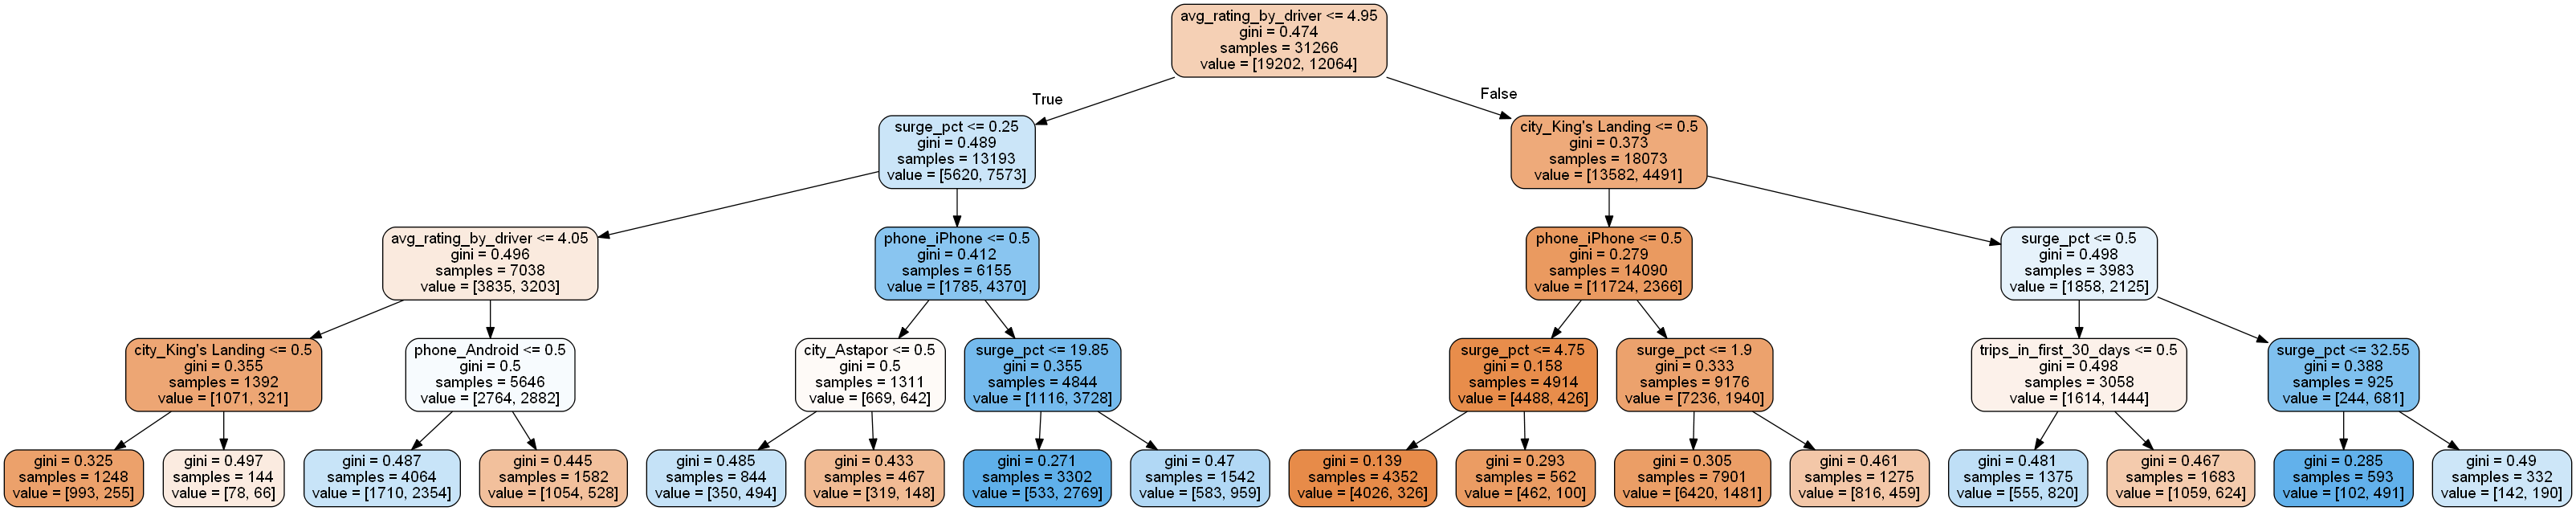

In [57]:
import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

graph = pydotplus.graph_from_dot_data(dot_data)
conda_fix(graph)
Image(graph.create_png())

We now have a model that is about 74% accurate and does a fairly good job of determining the difference between a retained and not retained user as shown by the confusion matrix. In addition, we may have increased accuracy by allowing the tree to grow further, but this reduces interpretability significantly. Looking at the tree, we see we have the most predictive features near the top of the tree. We can quantify how important these features are:

In [59]:
# Find feature importances
feature_importance = pd.DataFrame(final_clf.feature_importances_).T
feature_importance.columns = list(train.columns)
feature_importance

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.0,0.461056,0.0,0.0,0.187426,0.019828,0.0,0.011149,0.217964,0.0,0.035327,0.067249,0.0,0.0


Again, we see the most predictive features are near the top of the visualized tree as we expected. The top 3 most predictive features, from most to least, are avg_rating_by_driver, city_King's_Landing, and surge_pct.

In terms of model validity, this model is somewhat valid. I don't believe this data is appropriate for the task at hand since we have data for all 6-7 months of user activity and the resulting retention label. If we really want to find early predictors of retention, we should have had user activity up to January, no data for 6 months, and then apply retention labels to build a model to determine whether a user may still be riding with Ultimate after 6 months. This model merely serves as a current benchmark of sorts as opposed to being a valid predictor.

## Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

To improve longterm rider retention, Ultimate might want to focus on the top predictors of model performance:

1. avg_rating_by_driver: This indicates that riders <= rating 4.95 tend to retain more drivers. This is probabily because riders with an extremely high rating do not ride very often and, in turn, do not get rated very often which can cause discrepancies due to the skewed ratings and scores.
2. city_King's_Landing: This indicates that riders not from King's Landing tend to be retained more. It is possible that something is happening in this city with drivers or users that is not properly incentivizing retention. This deserves more attention and data to support the behavior observed.
3. surge_pct: This indicates that users that take <= 25% of their trips with a surge multiple > 1 tend to be retained more. This could signify that surges are too high and could use a reduction to increase user retention, passing the value through to the users would increase retention potential.